In [2]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [3]:
%config InlineBackend.figure_formate = 'svg'

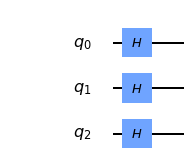

In [3]:
qc = QuantumCircuit(3)
for qubit in range(3):
    qc.h(qubit)
qc.draw(output='mpl')

In [4]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()

In [7]:
final_state #|+ + +  > 

array([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
       0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j])

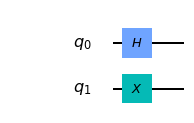

In [9]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl')

In [4]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

In [10]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc, backend).result().get_unitary()

In [14]:
matprint(unitary)

       0+0j                    0+0j  0.707107+0j   0.707107-8.65956e-17j  
       0+0j                    0+0j  0.707107+0j  -0.707107+8.65956e-17j  
0.707107+0j   0.707107-8.65956e-17j         0+0j                    0+0j  
0.707107+0j  -0.707107+8.65956e-17j         0+0j                    0+0j  


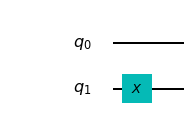

In [15]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw('mpl')

In [16]:
unitary = execute(qc, backend).result().get_unitary()
matprint(unitary) # X tensor I

0+0j  0+0j  1+0j  0+0j  
0+0j  0+0j  0+0j  1+0j  
1+0j  0+0j  0+0j  0+0j  
0+0j  1+0j  0+0j  0+0j  


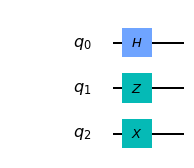

In [19]:
qc = QuantumCircuit(3)
qc.h(0)
qc.z(1)
qc.x(2)
qc.draw('mpl')

In [21]:
unitary = execute(qc, backend).result().get_unitary()
matprint(unitary)

       0+0j                    0+0j          0+0j                    0+0j  0.707107+0j   0.707107-8.65956e-17j          0+0j                    0+0j  
       0+0j                    0+0j          0+0j                    0+0j  0.707107+0j  -0.707107+8.65956e-17j          0+0j                    0+0j  
       0+0j                    0+0j          0+0j                    0+0j         0+0j                    0+0j  -0.707107+0j  -0.707107+8.65956e-17j  
       0+0j                    0+0j          0+0j                    0+0j         0+0j                    0+0j  -0.707107+0j   0.707107-8.65956e-17j  
0.707107+0j   0.707107-8.65956e-17j          0+0j                    0+0j         0+0j                    0+0j          0+0j                    0+0j  
0.707107+0j  -0.707107+8.65956e-17j          0+0j                    0+0j         0+0j                    0+0j          0+0j                    0+0j  
       0+0j                    0+0j  -0.707107+0j  -0.707107+8.65956e-17j         0+0j        

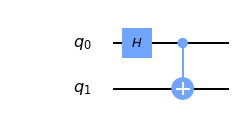

In [41]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl')

In [42]:
unitary = execute(qc,backend).result().get_unitary()

In [43]:
matprint(unitary)

0.707107+0j   0.707107-8.65956e-17j         0+0j                    0+0j  
       0+0j                    0+0j  0.707107+0j  -0.707107+8.65956e-17j  
       0+0j                    0+0j  0.707107+0j   0.707107-8.65956e-17j  
0.707107+0j  -0.707107+8.65956e-17j         0+0j                    0+0j  


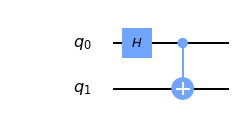

In [36]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl')

In [37]:
statevector = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
statevector

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

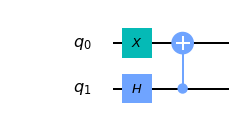

In [79]:
qc = QuantumCircuit(2)
qc.x(0)
qc.h(1)
qc.cx(1,0)
qc.draw('mpl')

In [80]:
statevector = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
statevector

array([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j])

In [81]:
unitary = execute(qc,backend).result().get_unitary()
matprint(unitary)

       0+0j  0.707107+0j                    0+0j   0.707107-8.65956e-17j  
0.707107+0j         0+0j   0.707107-8.65956e-17j                    0+0j  
0.707107+0j         0+0j  -0.707107+8.65956e-17j                    0+0j  
       0+0j  0.707107+0j                    0+0j  -0.707107+8.65956e-17j  


# Phase kickback

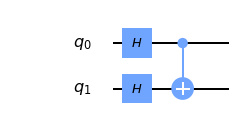

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw('mpl')

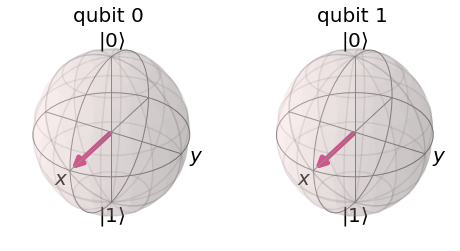

In [7]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc, statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

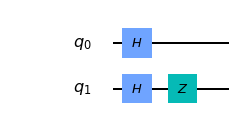

In [9]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.z(1)
qc.draw('mpl')

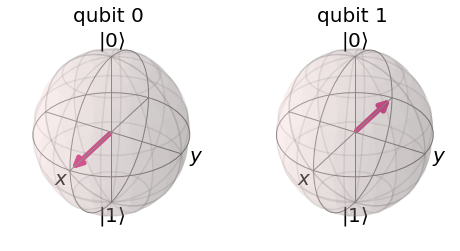

In [10]:
final_state = execute(qc, statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

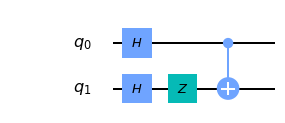

In [11]:
qc.cx(0,1)
qc.draw('mpl')

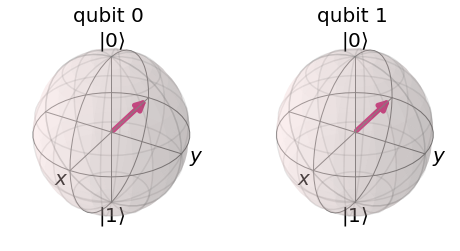

In [12]:
final_state = execute(qc, statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

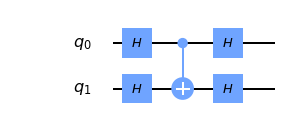

           1-1.22465e-16j   1.60754e-32+6.12323e-17j  -7.85046e-17+3.08149e-32j   1.11022e-16+6.12323e-17j  
 9.91238e-33+6.12323e-17j             1-2.44929e-16j   1.11022e-16+6.12323e-17j  -7.85046e-17+2.46519e-32j  
-1.11022e-16+6.12323e-17j   7.85046e-17-3.69779e-32j   1.57009e-16+6.12323e-17j             1-3.67394e-16j  
 7.85046e-17-1.84889e-32j  -1.11022e-16+6.12323e-17j             1-2.44929e-16j  -1.57009e-16+6.12323e-17j  


In [14]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw('mpl'))

unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc, unitary_backend).result().get_unitary()

matprint(unitary)

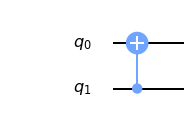

1+0j  0+0j  0+0j  0+0j  
0+0j  1+0j  0+0j  0+0j  
0+0j  0+0j  0+0j  1+0j  
0+0j  0+0j  1+0j  0+0j  


In [15]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw("mpl"))

unitary =  execute(qc, unitary_backend).result().get_unitary()
matprint(unitary)

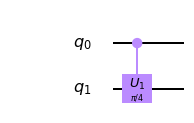

In [5]:
qc = QuantumCircuit(2)
qc.cu1(pi/4, 0 ,1)
qc.draw('mpl')

In [7]:
unitary_backend = Aer.get_backend("unitary_simulator")
unitary = execute(qc,unitary_backend).result().get_unitary()
matprint(unitary)

1+0j  0+0j  0+0j                0+0j  
0+0j  1+0j  0+0j                0+0j  
0+0j  0+0j  1+0j                0+0j  
0+0j  0+0j  0+0j  0.707107+0.707107j  


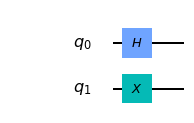

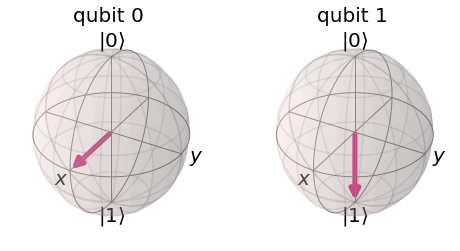

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw('mpl'))
final_state = execute(qc, Aer.get_backend("statevector_simulator")).result().get_statevector()
plot_bloch_multivector(final_state)

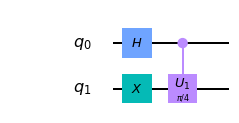

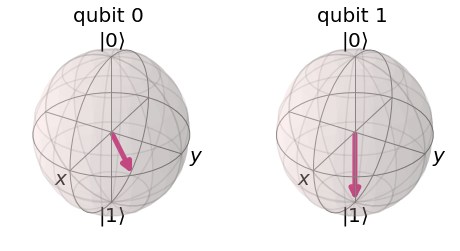

In [13]:
qc.cu1(pi/4, 0, 1) #1 is control qubit
display(qc.draw('mpl'))
final_state = execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(final_state)

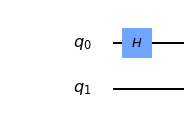

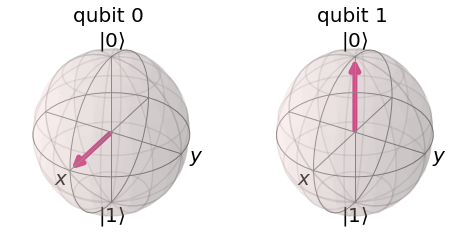

In [30]:
qc = QuantumCircuit(2)
qc.h(0)
#qc.x(1)
display(qc.draw('mpl'))
final_state = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(final_state)

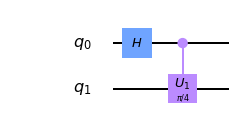

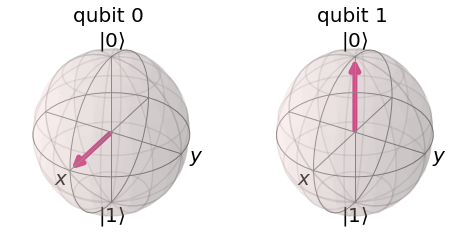

In [31]:
qc.cu1(pi/4, 0, 1)
display(qc.draw('mpl'))
final_state = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(final_state)

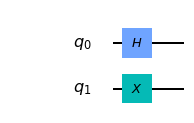

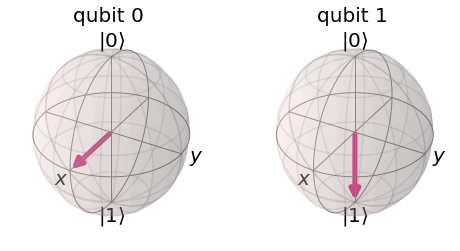

In [26]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw('mpl'))
final_state = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(final_state)

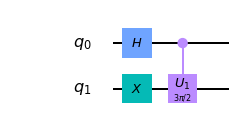

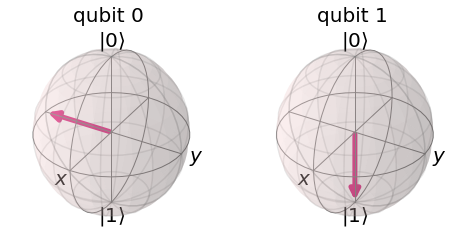

In [28]:
qc.cu1(3*pi/2, 0, 1)
display(qc.draw('mpl'))
final_state = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(final_state)

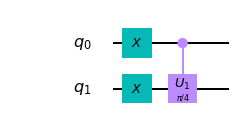

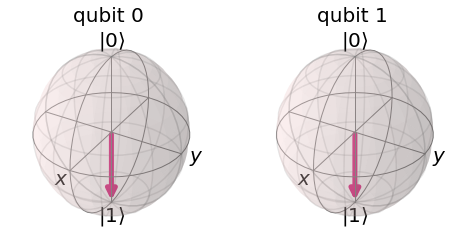

In [29]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.cu1(pi/4, 0 ,1)
display(qc.draw('mpl'))
final_state = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(final_state)

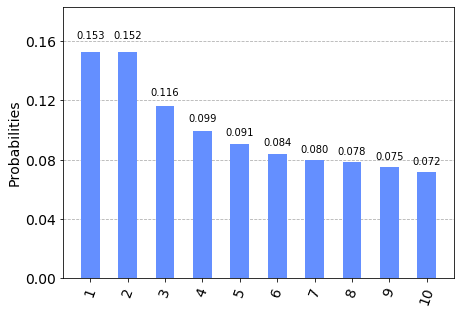

In [37]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

error = {}
for n in range(1,11):

    # Create a blank circuit
    qc = QuantumCircuit(q,c)
    
    # Implement an approximate Hadamard
    theta = np.pi # here we incorrectly choose theta=pi
    for j in range(n):
        qc.rx(theta/n,q[0])
        qc.rz(theta/n,q[0])
      
    # We need to measure how good the above approximation is. Here's a simple way to do this.
    # Step 1: Use a real hadamard to cancel the above approximation.
    # For a good approximatuon, the qubit will return to state 0. For a bad one, it will end up as some superposition.
    qc.h(q[0])
    
    # Step 2: Run the circuit, and see how many times we get the outcome 1.
    # Since it should return 0 with certainty, the fraction of 1s is a measure of the error.
    qc.measure(q,c)
    shots = 20000
    job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
    try:
        error[n] = (job.result().get_counts()['1']/shots)
    except:
        pass
        
plot_histogram(error)